In [1]:
!pip install ultralytics --quiet
!pip install roboflow --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.10 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflowjs 4.15.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.


In [2]:
import os
from IPython import display
display.clear_output()

from ultralytics import YOLO
from IPython.display import display, Image

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.2/8062.4 GB disk)


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="2cITmqLK5JrXVlQXhrZU")
project = rf.workspace("boston-university-cdr2g").project("shoes-seg")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Shoes-Seg-4 in yolov8:: 100%|██████████| 2015/2015 [00:00<00:00, 5736.72it/s]


In [4]:
!cat /kaggle/working/Shoes-Seg-4/data.yaml

names:
- shoe
nc: 1
roboflow:
  license: CC BY 4.0
  project: shoes-seg
  url: https://universe.roboflow.com/boston-university-cdr2g/shoes-seg/dataset/4
  version: 4
  workspace: boston-university-cdr2g
test: ../test/images
train: Shoes-Seg-4/train/images
val: Shoes-Seg-4/valid/images


In [5]:
!sed -i "s#Shoes-Seg-4/train/images#train/images#g" /kaggle/working/Shoes-Seg-4/data.yaml
!sed -i "s#Shoes-Seg-4/valid/images#valid/images#g" /kaggle/working/Shoes-Seg-4/data.yaml

In [6]:
!cat /kaggle/working/Shoes-Seg-4/data.yaml

names:
- shoe
nc: 1
roboflow:
  license: CC BY 4.0
  project: shoes-seg
  url: https://universe.roboflow.com/boston-university-cdr2g/shoes-seg/dataset/4
  version: 4
  workspace: boston-university-cdr2g
test: ../test/images
train: train/images
val: valid/images


In [7]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [8]:
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=200 imgsz=640

100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 158MB/s]
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/kaggle/working/Shoes-Seg-4/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

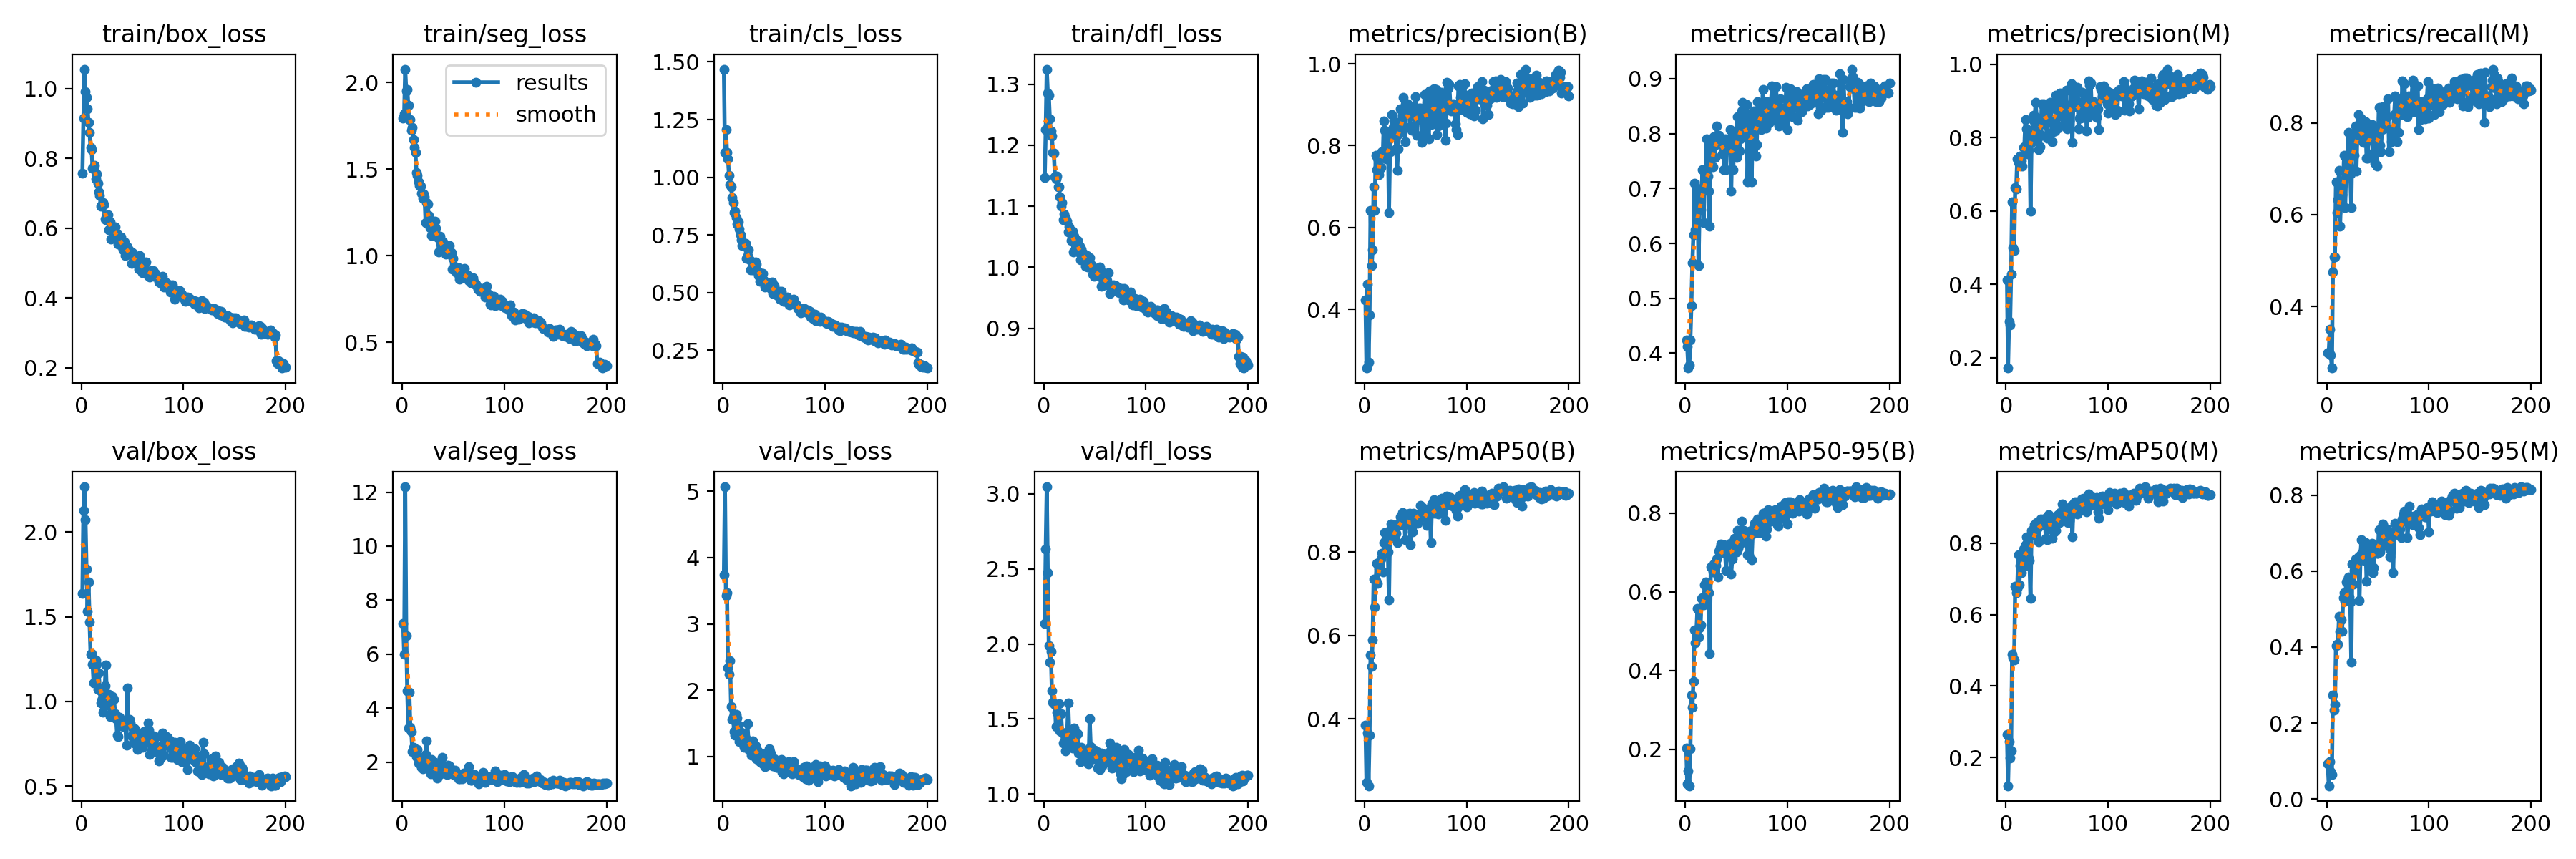

In [9]:
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

In [10]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.80 source=/kaggle/input/segment/shoes.jpg

/kaggle/working
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /kaggle/input/segment/shoes.jpg: 480x640 1 shoe, 85.4ms
Speed: 5.7ms preprocess, 85.4ms inference, 131.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


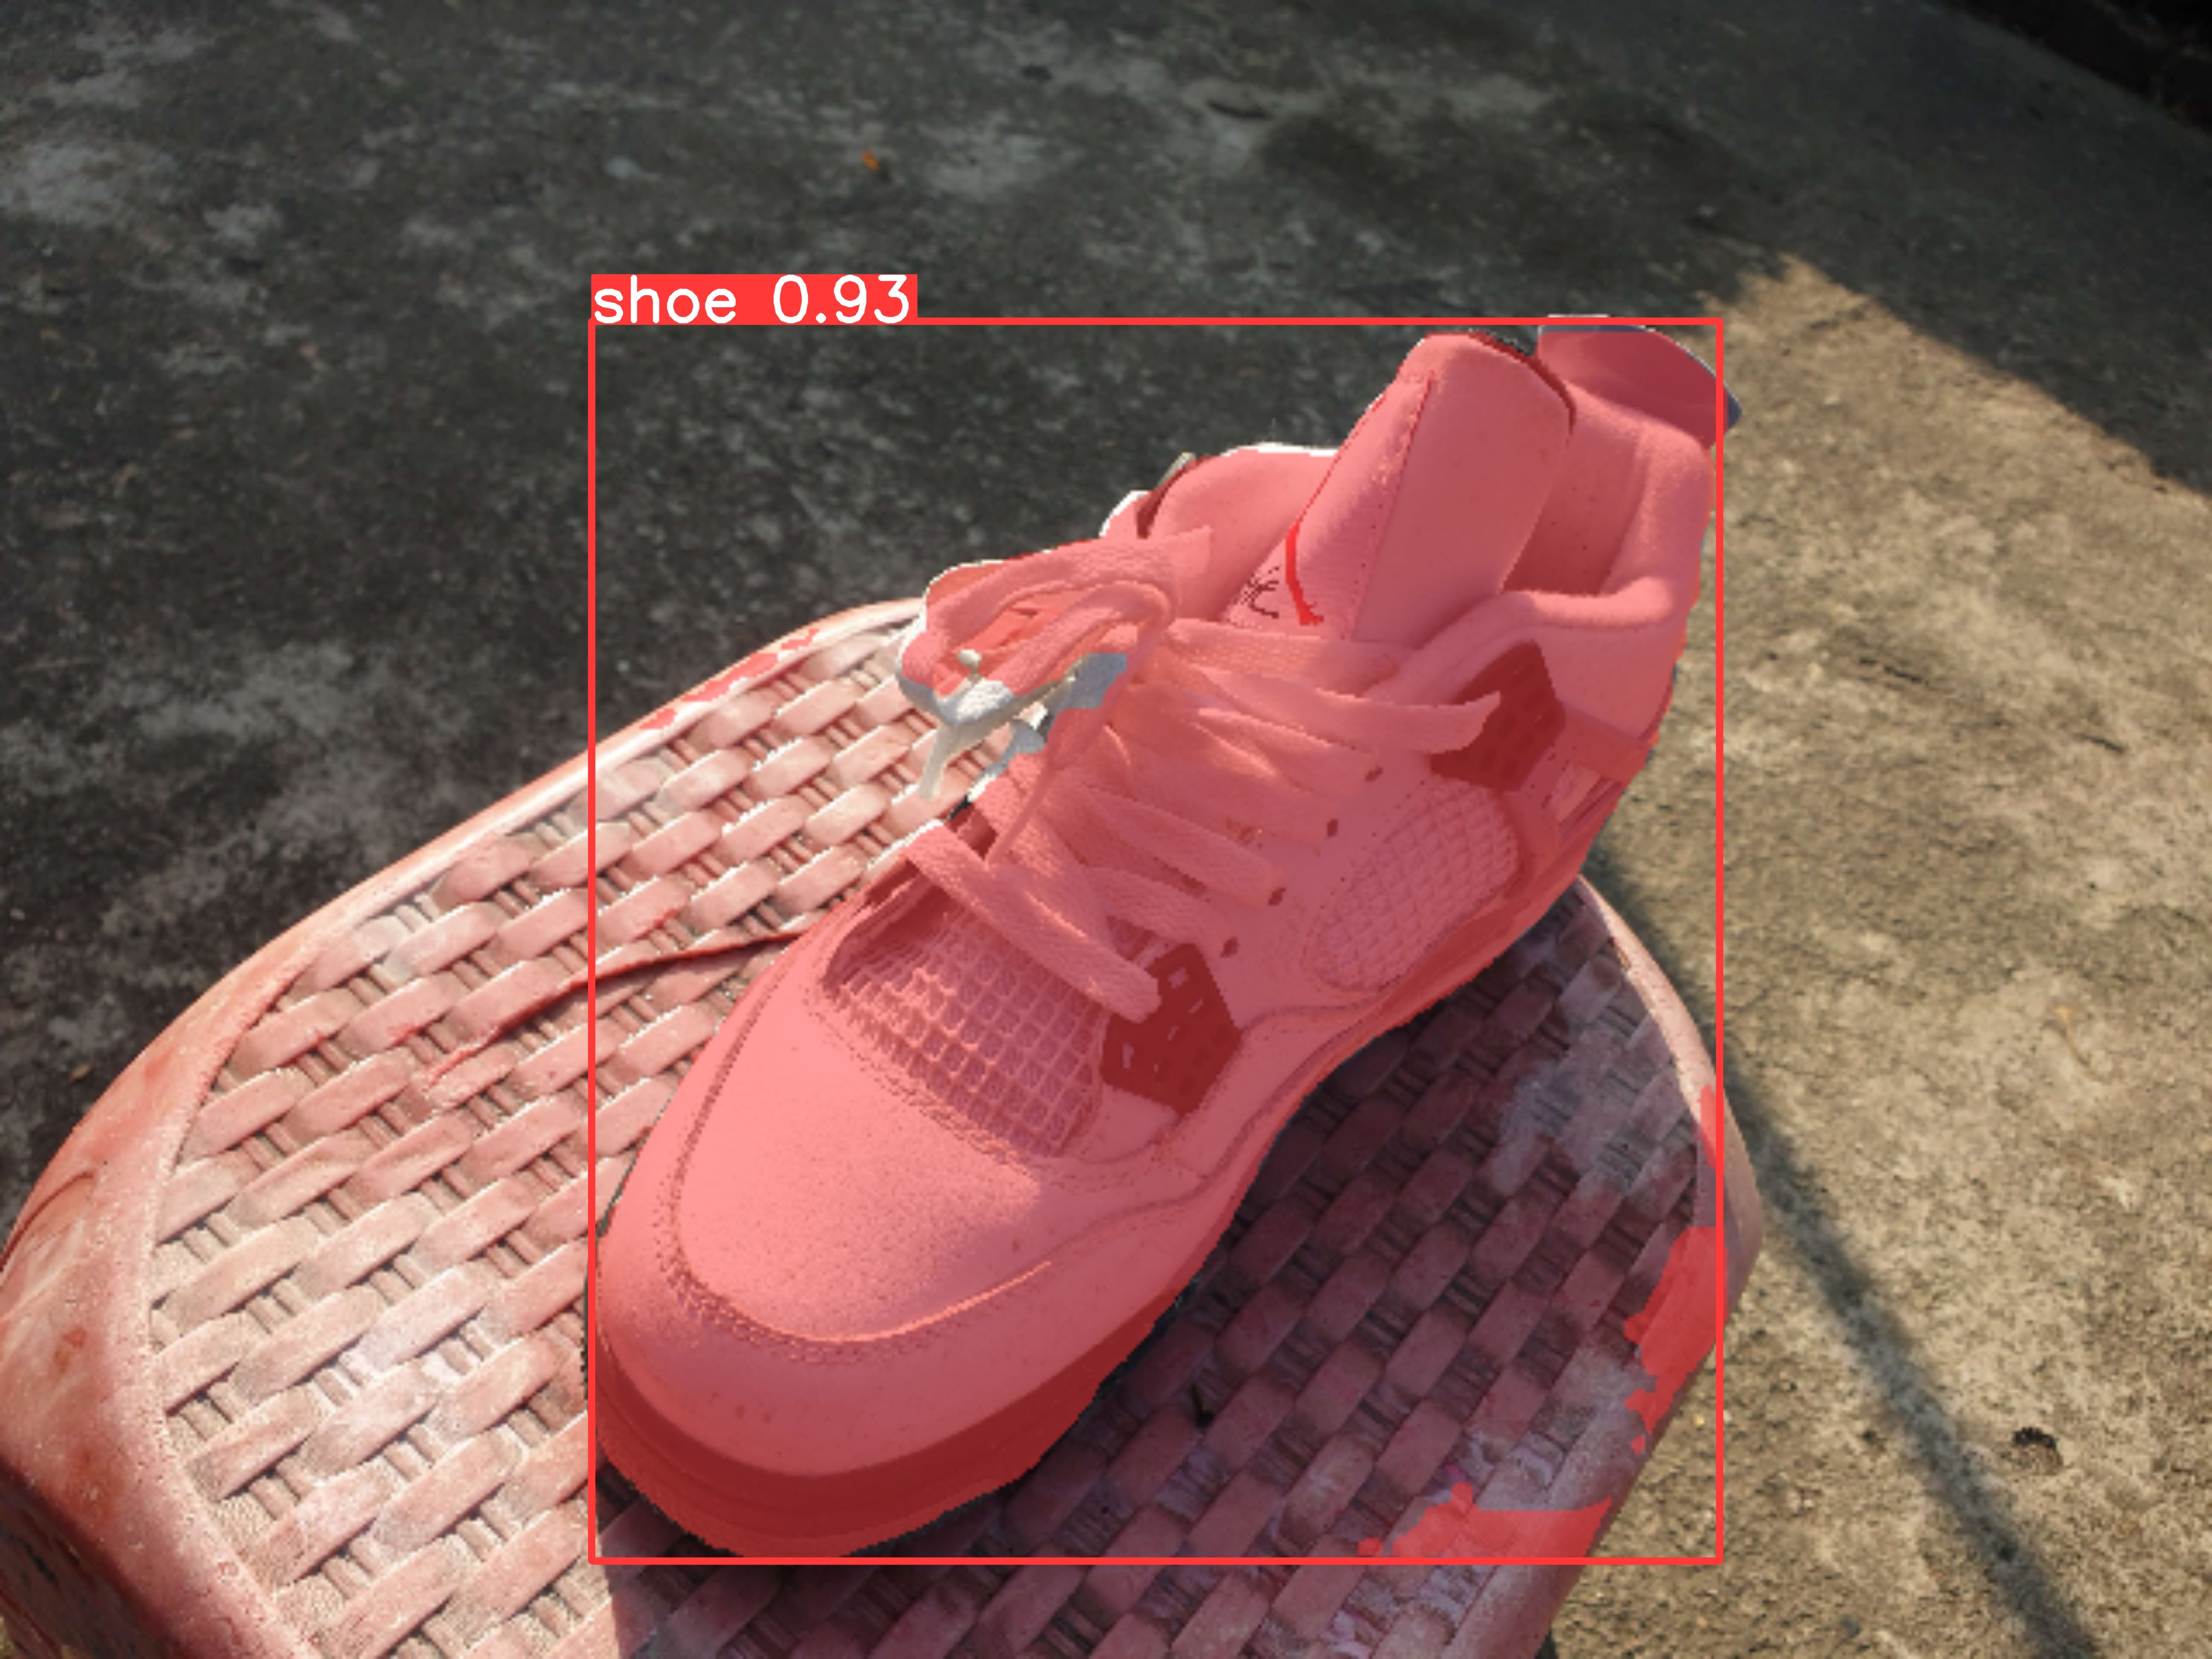

In [11]:
display(Image(filename="/kaggle/working/runs/segment/predict/shoes.jpg", height=600))